# This notebook is used to demonstrate topic modelling for tripadviser reviews

In [1]:
import pickle
import sys
import pandas as pd
import matplotlib.pyplot as plt

#nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

#Corex
from corextopic import corextopic as ct

sys.path.append('../src')
import util_topic
%matplotlib inline

In [2]:
wnl=WordNetLemmatizer()

# import dataset

In [3]:
df_review = pd.read_csv('../data/tripadvisor_hotel_reviews.csv')

In [4]:
df_review.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


 # prepare stopwords

In [5]:
stop_words = stopwords.words('english')
stop_words = list(set(stop_words+[e.replace("'",'') for e in stop_words]))

# prepare input data

In [6]:
df_processed = util_topic.prepare_data(df_review,wnl,stop_words)

In [7]:
df_processed = (
    df_processed.drop_duplicates(subset=['comment'])
    .reset_index(drop=True)
    )

# vectorize 

In [8]:
vectorizer = CountVectorizer(
    stop_words='english'
    , max_features=5000, binary=True
    , token_pattern=r"[a-zA-Z_]{3,}"
    ,ngram_range=(1, 1)
)

In [9]:
doc_word, words = util_topic.create_features(vectorizer,df_processed.comment.tolist())

# build up topic model

In [10]:
topic_model = ct.Corex(n_hidden=12, words=words, verbose=False, seed=1, max_iter=200)

In [11]:
topic_model.fit(doc_word, words=words)

# extract topics

In [12]:
df_processed, df_topics_top_docs, df_labels, topics, df_topics = util_topic.extract_topic(topic_model,df_processed)

In [13]:
df_topics

,top_topic_id
top_topic,
"beach, resort, food, pool, cana, punta, vacation, beautiful, ground, dominican",0
"drink, water, buffet, day, tip, eat, time, lunch, bring, bar",1
"people, say, try, know, thing, hour, come, wait, problem, bad",2
"walk, station, street, minute, shop, area, bus, metro, floor, city",3
"check, tell, leave, arrive, ask, desk, morning, open, later, door",4
"shower, bathroom, bed, towel, work, use, air, look, light, toilet",5
"make, want, service, best, sure, home, return, meet, spa, amaze",6
"pay, guest, offer, manager, change, request, experience, available, receive, smell",7
"like, really, way, bottle, table, extra, big, bite, feel, sit",8


# topic visualisation

<AxesSubplot:xlabel='top_topic_id'>

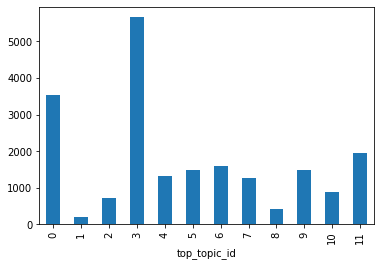

In [14]:
df_processed.groupby('top_topic_id').top_topic.count().plot.bar()

Text(0, 0.5, 'total correlation')

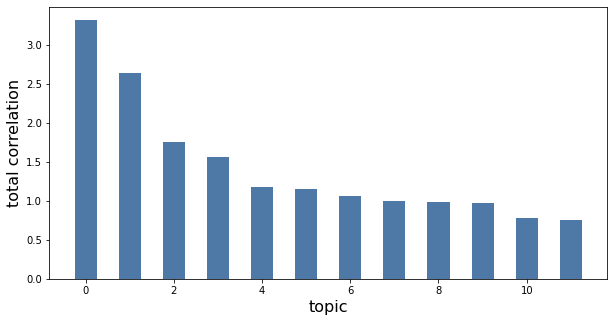

In [15]:
# total correlation contribution of each topic(usefulness)
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color = '#4e79a7', width=0.5)
plt.xlabel("topic", fontsize=16)
plt.ylabel('total correlation',fontsize=16)